This code solves the problem of disease prediction based on the input symptoms provided by the user. By leveraging a trained machine learning model, it takes a set of symptoms (like itching, skin rash, shivering, etc.) and predicts the most likely disease that matches those symptoms. The model is pre-trained using a dataset of various diseases (41) and their corresponding symptoms (132), enabling it to classify new symptom inputs into specific disease categories. This solution can be used to assist healthcare professionals or users in identifying potential diseases based on symptom descriptions.

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [4]:
import os
print(os.getcwd())

c:\Users\david\my_directory\team6-project\experiments


In [5]:
#Loading data from local folder
df_train_set = pd.read_csv('../data/processed/Training.csv')
df_test_set = pd.read_csv('../data/processed/Testing.csv')

In [6]:
df_train_set.info()
df_train_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, itching to prognosis
dtypes: int64(131), object(1)
memory usage: 5.0+ MB


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [7]:
df_test_set.info()
df_test_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 132 entries, itching to prognosis
dtypes: int64(131), object(1)
memory usage: 43.4+ KB


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [8]:
#I want to find if any of the columns have no symptoms and everything is zero. 

column_sum_train = df_train_set.sum()
any_zero_column_train_sum = (df_train_set.sum() == 0).any()
columns_with_zero_sum_train = column_sum_train[column_sum_train == 0].index.tolist()
any_zero_sum_train = len(columns_with_zero_sum_train) > 0

print("Any column sum is zero:", any_zero_sum_train)
print("Columns with sum zero:", columns_with_zero_sum_train)

print()
print()
column_sum_test = df_test_set.sum()
any_zero_column_test_sum = (df_test_set.sum() == 0).any()
columns_with_zero_sum_test = column_sum_test[column_sum_test == 0].index.tolist()
any_zero_sum_test = len(columns_with_zero_sum_test) > 0

print("Any column sum is zero:", any_zero_sum_test)
print("Columns with sum zero:", columns_with_zero_sum_test)


Any column sum is zero: True
Columns with sum zero: ['fluid_overload']


Any column sum is zero: True
Columns with sum zero: ['fluid_overload']


'Unnamed: 133' is an extra column in the training dataset

In [9]:
#Based on information above Unnamed 133 is an extra column in the test dataset whcih we want to remove. 
# Note column 'fluid_overload' has all symptoms = 0, so this can be potentially another column to drop later

df_train_set = df_train_set.drop(['Unnamed: 133'], axis=1)
# dropping column with fluid_overload where all values are "0"
df_train_set = df_train_set.drop(['fluid_overload'], axis=1)
df_test_set = df_test_set.drop(['fluid_overload'], axis=1)


# dropping columns with 5 least important symptoms from the previous model
df_train_set = df_train_set.drop(['weight_gain'], axis=1)
df_test_set = df_test_set.drop(['weight_gain'], axis=1)

df_train_set = df_train_set.drop(['foul_smell_of urine'], axis=1)
df_test_set = df_test_set.drop(['foul_smell_of urine'], axis=1)

df_train_set = df_train_set.drop(['swollen_blood_vessels'], axis=1)
df_test_set = df_test_set.drop(['swollen_blood_vessels'], axis=1)

df_train_set = df_train_set.drop(['cold_hands_and_feets'], axis=1)
df_test_set = df_test_set.drop(['cold_hands_and_feets'], axis=1)

df_train_set = df_train_set.drop(['drying_and_tingling_lips'], axis=1)
df_test_set = df_test_set.drop(['drying_and_tingling_lips'], axis=1)

column_sum_train = df_train_set.sum()
any_zero_column_train_sum = (df_train_set.sum() == 0).any()
columns_with_zero_sum_train = column_sum_train[column_sum_train == 0].index.tolist()
any_zero_sum_train = len(columns_with_zero_sum_train) > 0

print("Any column sum is zero:", any_zero_sum_train)
print("Columns with sum zero:", columns_with_zero_sum_train)

print()
print()
column_sum_test = df_test_set.sum()
any_zero_column_test_sum = (df_test_set.sum() == 0).any()
columns_with_zero_sum_test = column_sum_test[column_sum_test == 0].index.tolist()
any_zero_sum_test = len(columns_with_zero_sum_test) > 0

print("Any column sum is zero:", any_zero_sum_test)
print("Columns with sum zero:", columns_with_zero_sum_test)


KeyError: "['Unnamed: 133'] not found in axis"

In [10]:
df_train_set.head()
df_train_set.info()
df_train_set.shape
print()

df_test_set.head()
df_test_set.info()
df_test_set.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, itching to prognosis
dtypes: int64(131), object(1)
memory usage: 5.0+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 132 entries, itching to prognosis
dtypes: int64(131), object(1)
memory usage: 43.4+ KB


(42, 132)

In [11]:
#checking the rest of the set for missing values
df_train_set.isna().sum() 

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 132, dtype: int64

In [12]:
#checking the rest of the set for missing values
df_test_set.isna().sum() 

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 132, dtype: int64

In [14]:
X_train = df_train_set.drop(columns=['prognosis'])
y_train = df_train_set['prognosis']

X_test = df_test_set.drop(columns=['prognosis'])
y_test = df_test_set['prognosis']

In [15]:
#Checking how many unique diseases/prognoses we have
num_diseases = len(df_train_set['prognosis'].unique())
num_diseases

41

In [16]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
label_encoder = LabelEncoder()

# Fit and transform the prognosis labels into integers
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=41)  # 41 is the number of unique diseases
y_test = to_categorical(y_test, num_classes=41)



In [40]:
from keras.models import Sequential
from keras.layers import Dense

# Sequential model
model = Sequential()

# Add layers
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # input layer + first hidden layer
model.add(Dense(16, activation='relu'))  # second hidden layer
model.add(Dense(41, activation='softmax'))  # output layer (41 classes = disease)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                4224      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 41)                697       
                                                                 
Total params: 5,449
Trainable params: 5,449
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
154/154 [==============================] - 2s 6ms/step - loss: 3.0621 - accuracy: 0.2823 - val_loss: 1.9607 - val_accuracy: 0.7143
Epoch 2/20
154/154 [==============================] - 0s 3ms/step - loss: 0.9577 - accuracy: 0.9167 - val_loss: 0.2456 - val_accuracy: 1.0000
Epoch 3/20
154/154 [==============================] - 1s 5ms/step - loss: 0.1379 - accuracy: 1.0000 - val_loss: 0.0520 - val_accuracy: 1.0000
Epoch 4/20
154/154 [==============================] - 1s 4ms/step - loss: 0.0428 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 5/20
154/154 [==============================] - 1s 3ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 6/20
154/154 [==============================] - 1s 4ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 7/20
154/154 [==============================] - 1s 4ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 

In [25]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [30]:
import shap
import numpy as np
import matplotlib.pyplot as plt

def explain_multiclass_predictions(model, X_train, X_test, class_names=None, feature_names=None, 
                                 background_samples=100, test_samples=50):
    """
    Generate and visualize SHAP values for a multi-class neural network
    
    Parameters:
    -----------
    model : keras.Model
        Trained neural network model
    X_train : numpy.ndarray
        Training data used to build the background distribution
    X_test : numpy.ndarray
        Test instances to explain
    class_names : list
        Names of the output classes
    feature_names : list
        Names of the input features
    background_samples : int
        Number of background samples to use
    test_samples : int
        Number of test samples to explain
    """
    # Create background distribution
    background = X_train[np.random.choice(X_train.shape[0], background_samples, replace=False)]
    
    # Create explainer
    explainer = shap.DeepExplainer(model, background)
    
    # Calculate SHAP values for a subset of test data
    test_data = X_test[:test_samples]
    shap_values = explainer.shap_values(test_data)
    
    # Generate global feature importance plot
    plt.figure(figsize=(12, 6))
    mean_shap = np.mean([np.absolute(sv).mean(0) for sv in shap_values], axis=0)
    feature_importance = pd.DataFrame({
        'Feature': feature_names if feature_names is not None else [f'Feature {i}' for i in range(len(mean_shap))],
        'Importance': mean_shap
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    plt.barh(range(len(feature_importance)), feature_importance['Importance'])
    plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
    plt.title('Global Feature Importance (averaged across all classes)')
    plt.xlabel('Mean |SHAP value|')
    plt.tight_layout()
    plt.show()
    
    # Generate detailed SHAP summary plot
    shap.summary_plot(shap_values[0], test_data, 
                     feature_names=feature_names if feature_names is not None else None,
                     show=False)
    plt.title('SHAP Summary Plot for Class 0')
    plt.tight_layout()
    plt.show()
    
    return shap_values, explainer

# Function to explain individual predictions
def explain_single_prediction(shap_values, X_test, instance_index, class_names=None, feature_names=None):
    """
    Explain a single prediction in detail
    """
    plt.figure(figsize=(10, 6))
    
    # Get SHAP values for this instance for all classes
    instance_shap = [sv[instance_index] for sv in shap_values]
    
    # Plot SHAP values for each class
    class_impacts = np.array([abs(shap).mean() for shap in instance_shap])
    most_impacted_classes = np.argsort(class_impacts)[-5:]  # Top 5 most impacted classes
    
    for class_idx in most_impacted_classes:
        class_name = class_names[class_idx] if class_names is not None else f'Class {class_idx}'
        plt.subplot(len(most_impacted_classes), 1, list(most_impacted_classes).index(class_idx) + 1)
        
        shap.force_plot(explainer.expected_value[class_idx],
                       instance_shap[class_idx],
                       X_test[instance_index],
                       feature_names=feature_names if feature_names is not None else None,
                       show=False)
        plt.title(f'Impact on {class_name}')
    
    plt.tight_layout()
    plt.show()

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


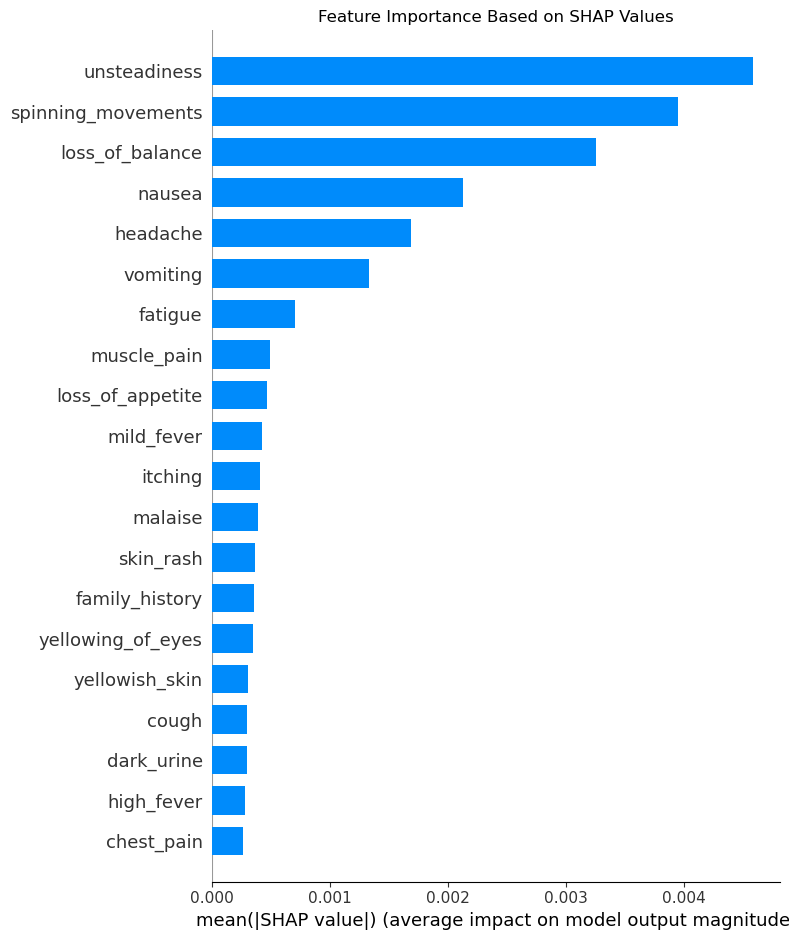

In [32]:
# First, ensure your data is in numpy array format
X_train_np = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else X_train
X_test_np = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else X_test

# Create a background dataset (using a smaller sample for efficiency)
background = X_train_np[np.random.choice(X_train_np.shape[0], 100, replace=False)]

# Create the explainer
explainer = shap.DeepExplainer(model, background)

# Calculate SHAP values for a few test instances
n_test_samples = 50  # Start with a small number for quick results
shap_values = explainer.shap_values(X_test_np[:n_test_samples])

# Create a summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values[0], X_test_np[:n_test_samples], 
                 feature_names= feature_names, 
                 plot_type="bar",
                 show=False)
plt.title('Feature Importance Based on SHAP Values')
plt.tight_layout()
plt.show()

Shows the overall importance of each symptom across all predictions
Top 3 most influential symptoms are:

- Unsteadiness
- Spinning movements
- Loss of balance


This suggests that neurological/balance-related symptoms are the strongest predictors in your model
Less influential symptoms include chest pain, high fever, and dark urine

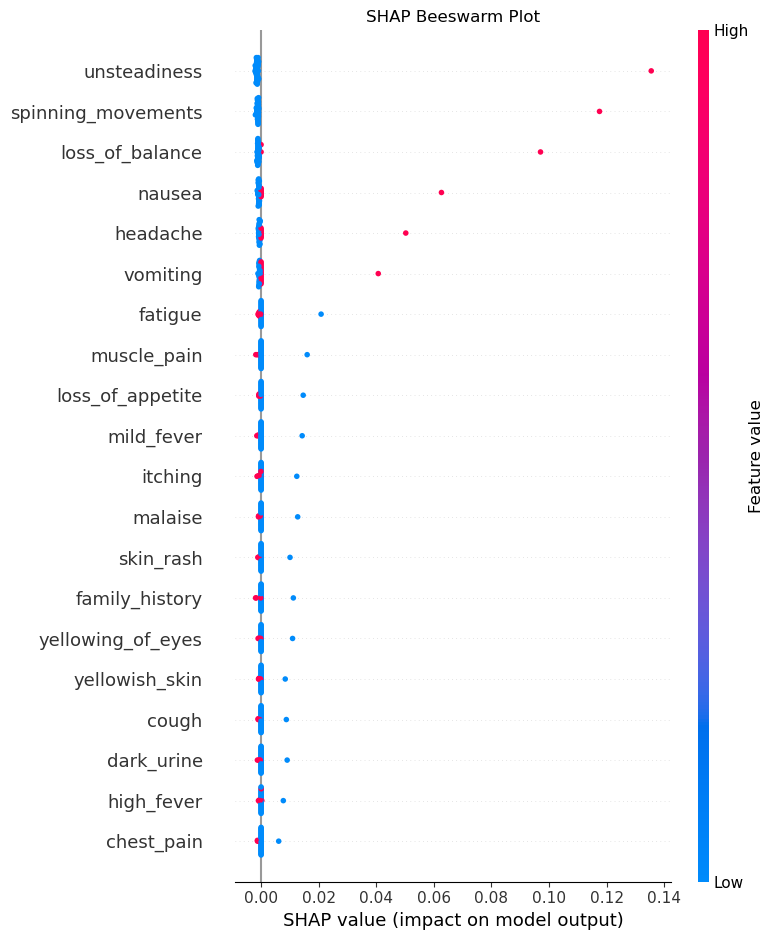

1/1 [==============================] - 0s 27ms/step


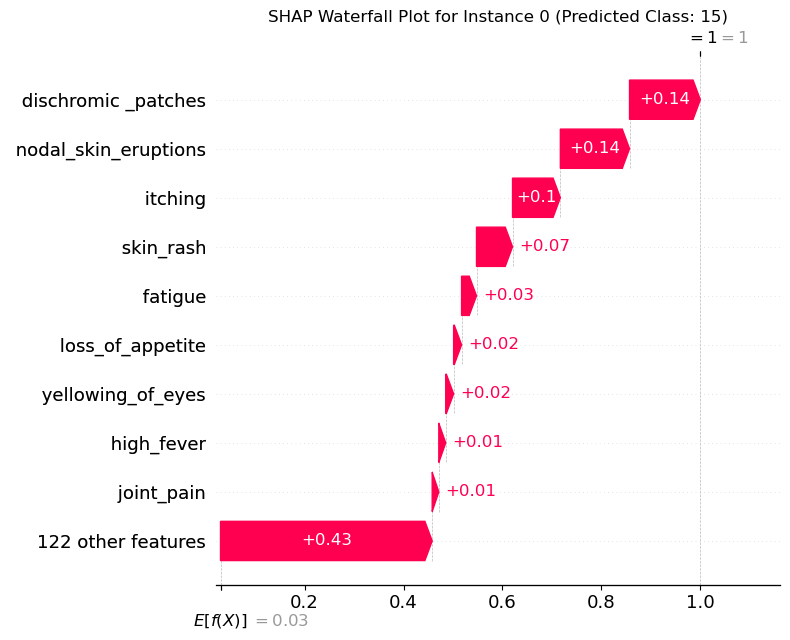

In [34]:
# Beeswarm plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values[0], X_test_np[:n_test_samples], 
                 feature_names= feature_names,
                 plot_type="dot",  # This creates the beeswarm plot
                 show=False)
plt.title('SHAP Beeswarm Plot')
plt.tight_layout()
plt.show()

# Waterfall plot for a single prediction
# Let's look at the first test instance
instance_index = 0
# Get the predicted class for this instance
prediction = model.predict(X_test_np[instance_index:instance_index+1])
predicted_class = np.argmax(prediction)

plt.figure(figsize=(10, 12))
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[predicted_class],
    shap_values[predicted_class][instance_index],
    X_test_np[instance_index],
    feature_names= feature_names,
    show=False
)
plt.title(f'SHAP Waterfall Plot for Instance {instance_index} (Predicted Class: {predicted_class})')
plt.tight_layout()
plt.show()

Unsteadiness has some high-impact cases (dots far to the right)
Lower features like chest_pain have more consistent but smaller impacts
Red dots on the right indicate that when these symptoms are present (high value), they strongly increase the likelihood of certain diseases

The example seems to show feature importance of a skin-related condition 

In [35]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

2/2 [==============================] - 0s 5ms/step - loss: 0.1075 - accuracy: 0.9762
Test Loss: 0.10746309906244278
Test Accuracy: 0.976190447807312


In [36]:
# Predict on new data (example)
predictions = model.predict(X_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert the integer labels back to the original disease names
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Example: Print first 5 predictions
print(predicted_labels[:5])

2/2 [==============================] - 0s 3ms/step
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction']


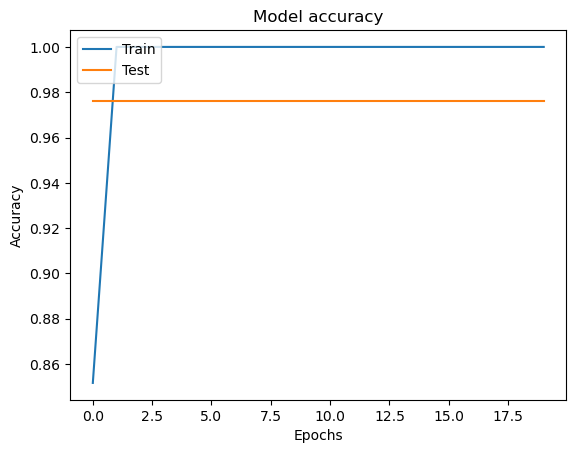

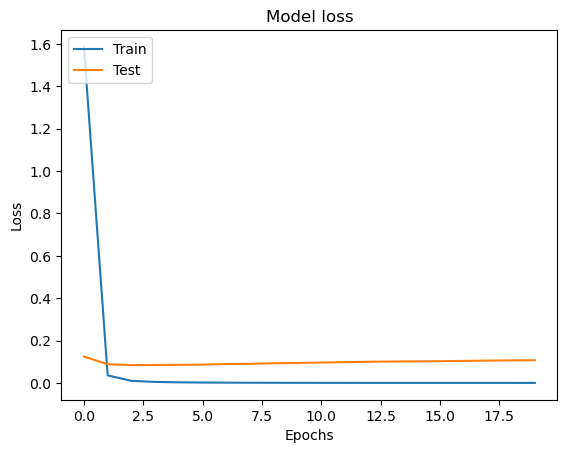

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

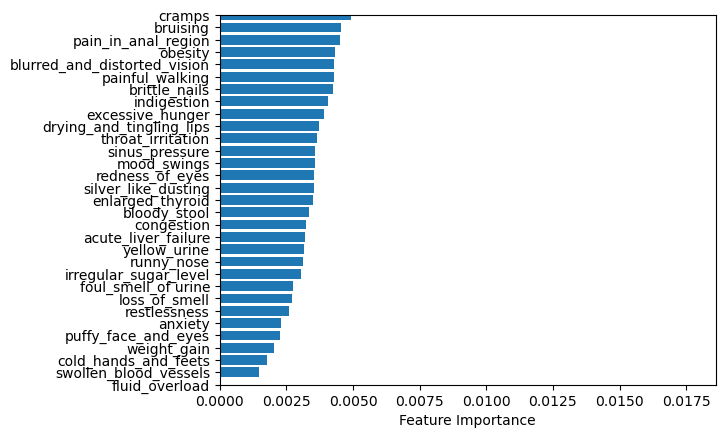

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier as an alternative model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Display the feature importances
sorted_idx = np.argsort(importances)
plt.barh(range(X_train.shape[1]), importances[sorted_idx], align='center')
plt.yticks(range(X_train.shape[1]), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylim(bottom = 0, top = 30)
plt.show()

# Features with low importance are "useless"

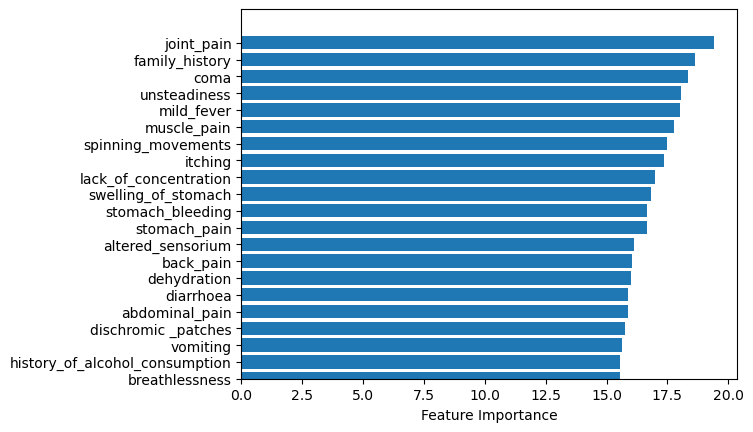

In [39]:
# Access the weights of the first layer
weights = model.layers[0].get_weights()[0]  # Weights of the first Dense layer

# Get the magnitude of the weights
feature_importance = np.abs(weights).sum(axis=1)

# Sort the features by importance
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.barh(range(X_train.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X_train.shape[1]), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylim(bottom = 110, top = 132)
plt.show()